In [8]:
import os
import itertools
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pickle

In [9]:
# Set up paths for the three folders (0, 1, 2)
data_dir = './data'
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',]  # Labels for the 10 classes
image_size = (42, 42)  # Resize the images to 42x42

# Prepare lists to hold image data and labels
image_data = []
labels = []

# Loop through each folder, load images, and assign labels
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    label = int(folder)  # The folder name corresponds to the label
    
    # Loop through each image in the folder
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        
        # Load the image and resize it to (42, 42)
        img = image.load_img(img_path, target_size=image_size, color_mode='rgb')  # Ensure RGB if needed
        img_array = image.img_to_array(img)  # Convert image to array
        
        # Normalize the image pixel values to [0, 1]
        img_array = img_array / 255.0
        
        image_data.append(img_array)
        labels.append(label)

# Convert lists to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Convert labels to one-hot encoding (for multi-class classification)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Check the shape of the data
print(f"Data shape: {image_data.shape}, Labels shape: {labels.shape}")

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    image_data, labels, test_size=0.2, shuffle=True, stratify=labels
)

# Reshape the data for CNN (samples, height, width, channels)
# Ensure channels are included (3 for RGB, 1 for grayscale)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 3))  # If RGB
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 3))  # If RGB

Data shape: (970, 42, 42, 3), Labels shape: (970, 10)


C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.0895 - loss: 2.3586 - val_accuracy: 0.1237 - val_loss: 2.2875
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.1672 - loss: 2.2681 - val_accuracy: 0.3608 - val_loss: 2.0850
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3779 - loss: 1.9700 - val_accuracy: 0.4794 - val_loss: 1.6282
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.5025 - loss: 1.4860 - val_accuracy: 0.5309 - val_loss: 1.3871
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6382 - loss: 1.1817 - val_accuracy: 0.6649 - val_loss: 1.0577
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7249 - loss: 0.9234 - val_accuracy: 0.6804 - val_loss: 0.9787
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7308 - loss: 0.8007 - val_accuracy: 0.7784 - val_loss: 0.7469
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8430 - loss: 0.5249 - val_accuracy: 0.7732 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Confusion Matrix:
 [[18  0  0  0  0  1  0  0  0  0]
 [ 1 17  0  1  0  0  0  0  0  0]
 [ 0  1 11  0  0  1  0  2  5  0]
 [ 0  0  0 18  0  1  0  0  1  0]
 [ 0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  1  0]
 [ 0  0  0  0  0  3 16  0  0  0]
 [ 0  1  0  0  0  0  0 15  3  1]
 [ 0  0  0  0  0  0  0  0 19  0]
 [ 0  3  0  1  0  0  0  0  2 14]]


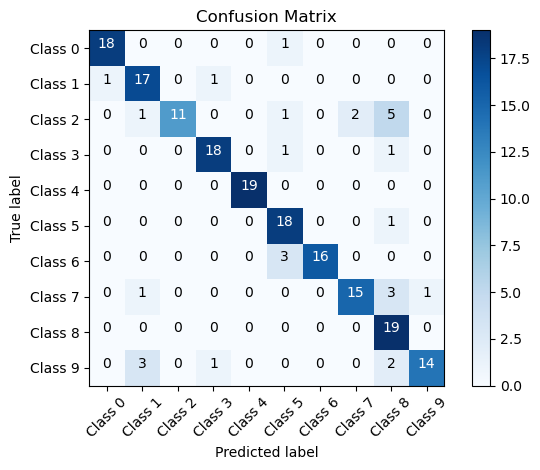

In [14]:
# Build the CNN model
model = Sequential()

# First Conv2D layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(42, 42, 3)))  # (height, width, channels)
model.add(MaxPooling2D((2, 2)))

# Second Conv2D layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the data before passing to Dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer (softmax for multi-class classification)
model.add(Dense(labels.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Training accuracy: {train_acc * 100}%')
print(f'Testing accuracy: {test_acc * 100}%')

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Optional: Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


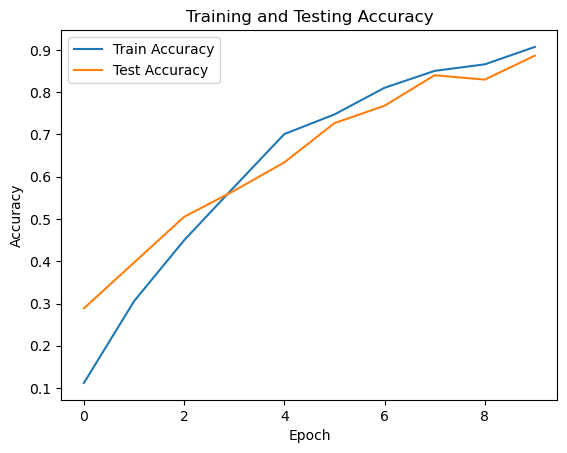

In [11]:
# Plot training and testing accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

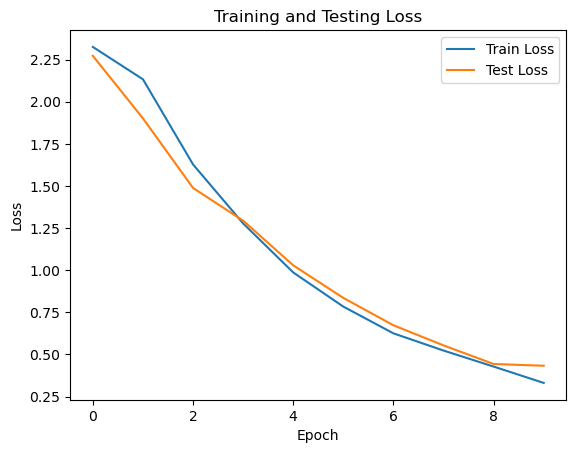

In [12]:
# Plot training and testing loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Save the trained model using pickle for future use
with open('model.p', 'wb') as f:
    pickle.dump({'model': model}, f)

In [15]:
# Save the model in TensorFlow format
model.save('model.h5')